## CHICAGO CRIME ALERT

In [1]:
%load_ext watermark

In [3]:
%watermark -v -u -n -t -z -a 'Samira Kumar' -p numpy,scipy,matplotlib,sklearn

Samira Kumar 
last updated: Thu Dec 13 2018 22:02:29 PST

CPython 2.7.15
IPython 5.8.0

numpy 1.15.3
scipy 1.1.0
matplotlib 2.2.3
sklearn 0.19.2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.DataFrame(pd.read_csv('cleaned_file.csv'))
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Updated On,Latitude,Longitude,Location,time_crime,time_hour,minutes,seconds,dates,day_of_week
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",0 days 11:40:00.000000000,23,40,0,2016-05-03,1
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",0 days 09:40:00.000000000,21,40,0,2016-05-03,1
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",0 days 11:31:00.000000000,23,31,0,2016-05-03,1
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",0 days 10:10:00.000000000,22,10,0,2016-05-03,1
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",0 days 10:00:00.000000000,22,0,0,2016-05-03,1


### Creating the cluster
In order to create a crime alert, we're clustering a sample of 500000 crimes into 200 clusters. The cluster size can be any number. Higher the cluster number, better the alert system.

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
data=df.sample(500000).copy()
ml = KMeans(n_clusters=200, init='k-means++')
ml.fit(data[['Longitude', 'Latitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
cluster = ml.cluster_centers_
cluster[:10]

array([[-87.58564446,  41.76842148],
       [-87.70954061,  41.88284319],
       [-87.66222958,  41.76711367],
       [-87.66692053,  41.9410608 ],
       [-87.78625868,  41.93248014],
       [-87.62523552,  41.85573192],
       [-87.62398212,  41.72210565],
       [-87.72503318,  41.80416549],
       [-87.76813019,  41.8947028 ],
       [-87.68737204,  42.01373099]])

#### Total crimes for each cluster

In [10]:
X = data[['Longitude','Latitude']].values
predictions = ml.fit_predict(X)
kclustered = pd.concat([data.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
kclustered.drop('index', axis=1, inplace=True)
centers = ml.cluster_centers_
kcenters=pd.DataFrame(centers)
kcenters=kcenters.rename(columns={0:'Longitude',1:'Latitude'})
kcenters['Total Crimes']=kclustered.groupby('Cluster')['ID'].count().reset_index()['ID']
kcenters

,Longitude,Latitude,Total Crimes
0,-87.562543,41.757362,5633
1,-87.723997,41.874345,3391
2,-87.647856,41.737336,3153
3,-87.626566,41.898832,5280
4,-87.661300,41.989576,2874
5,-87.689190,41.788970,2284
6,-87.787579,41.936611,1495
7,-87.604033,41.814649,3050
8,-87.719462,41.922614,2309
9,-87.644212,41.691239,1845


#### Using geocoders, we find the address for each cluster centers. This is just for plotting the cluster centers on Folium

In [96]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(timeout=3)

address=[]
for index,row in kcenters.iterrows():
    rev_location=geolocator.reverse(np.array([row.Latitude, row.Longitude]))
    address.append(rev_location.address)
kcenters['Address']=address
kcenters.head()

,Longitude,Latitude,Total Crimes,Address
0,-87.562543,41.757362,5633,"2532-2546, East 76th Street, South Shore HIsto..."
1,-87.723997,41.874345,3391,"3922, West Congress Parkway, West Garfield Par..."
2,-87.647856,41.737336,3153,"8614, South Sangamon Street, Chester Highlands..."
3,-87.626566,41.898832,5280,"America-Fore Building, 844, North Rush Street,..."
4,-87.661300,41.989576,2874,"5917, North Magnolia Avenue, Edgewater Glen, E..."


### Plotting the cluster centers on Folium

In [120]:
import folium

m = folium.Map(location=[41.8781,-87.64], zoom_start=11)

for i in range(0,len(kcenters)):
   folium.Circle(
      location=[kcenters.iloc[i]['Latitude'], kcenters.iloc[i]['Longitude']],
       popup = (
        "<b>Location:</b> {loc}</br></br>"
        "<b>Crimes: </b> {crime}<br>"
    ).format(loc=str(kcenters.iloc[i]['Address']), crime=str(kcenters.iloc[i]['Total Crimes'])),
      radius=kcenters.iloc[i]['Total Crimes']/15,
      color='red',
      fill=True,
      fill_color='red',
      fill_opacity=0.5
   ).add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
m.save('clustered_200.html')
m

In [26]:
data['cluster'] = ml.predict(data[['Longitude','Latitude']])
data[['ID','Latitude','Longitude','Block','cluster']].sample(10)

,ID,Latitude,Longitude,Block,cluster
1059816,10130901,41.916053,-87.719181,019XX N LAWNDALE AVE,8
1181829,10343488,41.883165,-87.769861,001XX N MENARD AVE,56
790069,9587080,41.754593,-87.741529,076XX S CICERO AVE,49
432678,8993045,41.747393,-87.585439,081XX S STONY ISLAND AVE,41
1241362,10446682,41.894166,-87.621850,002XX E ERIE ST,101
1336621,10634007,41.839811,-87.617142,030XX S DR MARTIN LUTHER KING JR DR,62
585300,9238321,41.961703,-87.698484,044XX N CALIFORNIA AVE,17
571046,9215466,41.750802,-87.599109,079XX S DOBSON AVE,72
754525,9522175,41.912324,-87.749758,049XX W ST PAUL AVE,147
1321870,10609016,41.744094,-87.594707,012XX E 83RD ST,72


### We're predicting the same data to find cluster of each crime. We can plot the cluster and centers in a voronoi plot as below

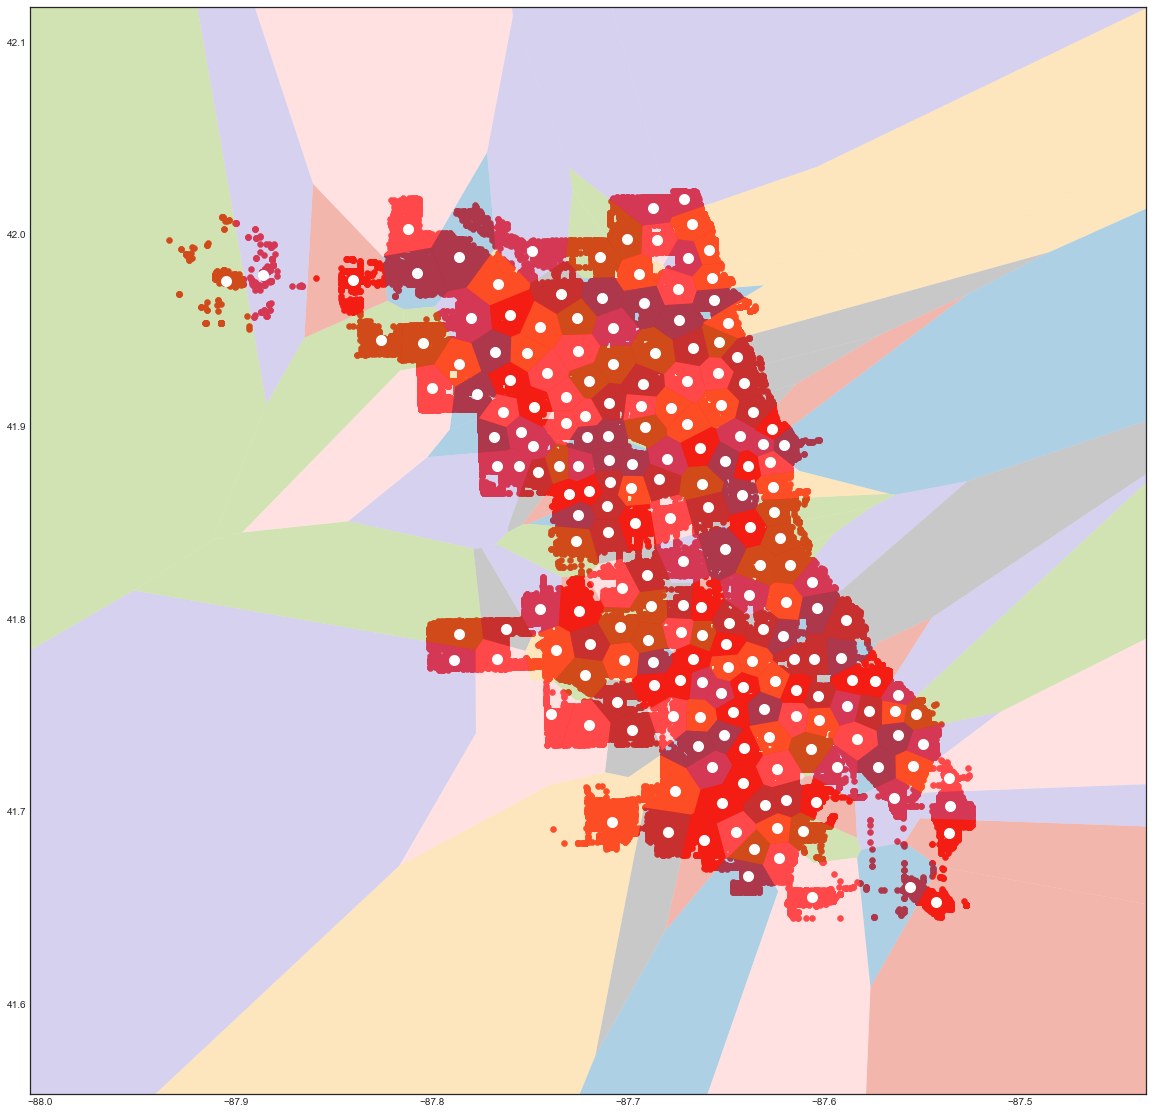

In [27]:
from scipy.spatial import Voronoi

def voronoi_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Input_args:
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    :returns:
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
points = cluster

# compute Voronoi tesselation
vor = Voronoi(points)

# compute regions
regions, vertices = voronoi_polygons_2d(vor)

# prepare figure
plt.style.use('seaborn-white')
fig = plt.figure()
fig.set_size_inches(20,20)

#geomap
# centroids
plt.plot(points[:,0], points[:,1], 'wo',markersize=10)

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
    
plt.scatter(data['Longitude'],data['Latitude'],c='red')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

In [28]:
global_df = data.groupby(['cluster', 'Block']).size().reset_index()
global_df.columns = ['cluster', 'Block', 'count']
global_df.head()

,cluster,Block,count
0,0,008XX E 75TH ST,1
1,0,022XX E 75TH ST,22
2,0,022XX E 76TH ST,2
3,0,022XX E 77TH ST,5
4,0,022XX E 78TH ST,3


### For each cluster, we're finding the block which has the highest crimes. So we'd get 200 blocks which have high crimes in their cluster.

In [29]:
topcrimes_df=global_df.sort_values('count',ascending=False)
topcrimes_df.groupby(['cluster'])['count'].max().reset_index()
#Sorting the cluster and removing duplicates would keep only one cluster for each block
topcrimes_df=topcrimes_df.sort_values('count', ascending=False).drop_duplicates(['cluster'])
topcrimes_df.to_csv('topcrimes_df.csv')
topcrimes_df.head(20)

,cluster,Block,count
5958,39,001XX N STATE ST,1025
2001,13,0000X W TERMINAL ST,937
477,3,008XX N MICHIGAN AVE,850
7734,49,076XX S CICERO AVE,765
19549,124,064XX S DR MARTIN LUTHER KING JR DR,491
25265,161,083XX S STEWART AVE,436
26232,168,051XX W MADISON ST,411
23166,147,046XX W NORTH AVE,400
27664,177,011XX S CANAL ST,382
16071,103,040XX W LAKE ST,363


#### Inspired from this post: https://github.com/modqhx/geolocation_ml_Analysis/blob/master/.ipynb_checkpoints/Recommendation_Spatial_ML-checkpoint.ipynb

#### Creating an alert of nearby high crime block. So this works on concept for each new given longitude and latitude, the cluster is predicted and the highest crime block is given as output. A google maps location is also given as HTML link.

In [91]:
from IPython.core.display import display, HTML
import requests, json

def get_crime_url(location):
#     text = requests.utils.quote(location)
    url = "http://maps.google.com/maps?q={},{}".format(location[1],location[0])
    return url


def crime_alert_closest(lon, lat):
    cluster = ml.predict(np.array([lon, lat]).reshape(1, -1))[0]
    crime_block = str(topcrimes_df[topcrimes_df['cluster']==cluster].iloc[0]['Block'])
    count = topcrimes_df[topcrimes_df['Block']==crime_block].iloc[0]['count']
#     location=np.array([lon,lat])
    location=df[df['Block']==crime_block][['Longitude','Latitude']].mean().values
    url = get_crime_url(location)
    if url:
        crime_html = '<a href="{}">{}</a>'.format(url, crime_block)
    else:
        crime_html = crime_block
    msg = "The most violent block closest to your location is {} and the total crimes in that block is {}".format(crime_html,count)
    return display(HTML(msg))

In [92]:
crime_alert_closest( -87.6, 41.8)

In [93]:
crime_alert_closest(-88.627, 39.7)

In [94]:
crime_alert_closest(-87.62923881,  41.88393292)

#### Creating an alert of a nearby crime. If the crime and user location are in same cluster, then alert will be provided. Geocoder used to find the address of crime and send it to user as HTML

In [83]:
from pygeocoder import Geocoder
from geopy.geocoders import Nominatim


def get_crime_url(location):
    url = "http://maps.google.com/maps?q={},{}".format(location.item(0),location.item(1))
    return url


def crime_alert(crime_lon, crime_lat, person_lon, person_lat):
    msg=[]
    cluster_crime = ml.predict(np.array([crime_lon,crime_lat]).reshape(1, -1))[0]
    cluster_person = ml.predict(np.array([person_lon,person_lat]).reshape(1, -1))[0]
    crime_block = str(topcrimes_df[topcrimes_df['cluster']==cluster_crime].iloc[0]['Block'])
#     location=data[data['Block']==crime_block][['Longitude','Latitude']].mean().values

    geolocator = Nominatim()
    location_add=np.array([crime_lat, crime_lon])
    rev_location = geolocator.reverse(location_add)
    address=(rev_location.address)
    
    url = get_crime_url(location_add)
    if url:
        crime_html = '<a href="{}">{}</a>'.format(url, address)
    else:
        crime_html = address
        
    if cluster_crime==cluster_person:
        msg = "There is a crime near your location, at {}".format(crime_html)
    else: 
        msg='No crimes around you now'
    return display(HTML(msg))

In [84]:
crime_alert(-87.627877,  41.931080,-85.62923881,  41.88393292)

In [90]:
crime_alert(-87.75,  41.88393292,-87.739,  41.892)

In [89]:
crime_alert(-87.789,  41.97,-87.79,  41.975)